In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')


In [0]:
#from google.colab import files
#uploaded = files.upload()


In [7]:
df = pd.read_csv('/content/drive/My Drive/Total_cases_China.csv', index_col = 'Dates')
df.tail(19)

,China Confirmed Cases,Confirmed Deaths,Confirmed Recovered
Dates,,,
03/22/2020,81435,3274,72362
03/23/2020,81498,3274,72814
03/24/2020,81591,3281,73280
03/25/2020,81661,3285,73773
03/26/2020,81782,3291,74181
03/27/2020,81897,3296,74720
03/28/2020,81999,3299,75100
03/29/2020,82122,3304,75582
03/30/2020,82198,3308,75923


In [8]:
df.shape

(79, 3)

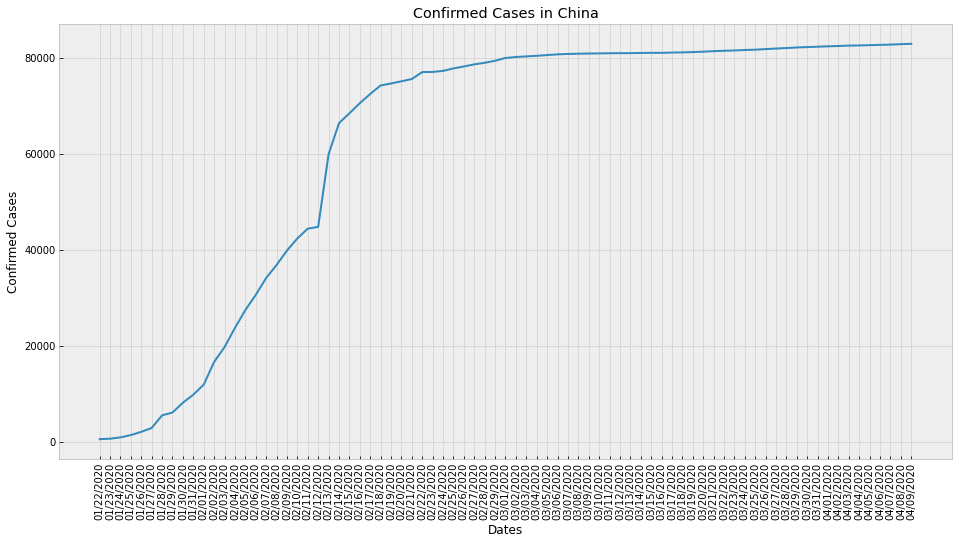

In [61]:
plt.figure(figsize=(16,8))
plt.title('Confirmed Cases in China')
plt.xlabel('Dates')
plt.ylabel('Confirmed Cases')
plt.plot(df['China Confirmed Cases'])
plt.xticks(rotation=90)
plt.show()

In [10]:
df = df[['China Confirmed Cases']]
df.head(4)

,China Confirmed Cases
Dates,
01/22/2020,548
01/23/2020,643
01/24/2020,920
01/25/2020,1406


In [11]:
future_days = 25
df['Predicted Cases'] = df[['China Confirmed Cases']].shift(-future_days)
df.head(4)

,China Confirmed Cases,Predicted Cases
Dates,,
01/22/2020,548,70513.0
01/23/2020,643,72434.0
01/24/2020,920,74211.0
01/25/2020,1406,74619.0


In [12]:
df.tail(20)

,China Confirmed Cases,Predicted Cases
Dates,,
03/21/2020,81350,NaN
03/22/2020,81435,NaN
03/23/2020,81498,NaN
03/24/2020,81591,NaN
03/25/2020,81661,NaN
03/26/2020,81782,NaN
03/27/2020,81897,NaN
03/28/2020,81999,NaN
03/29/2020,82122,NaN


In [13]:
X = np.array(df.drop(['Predicted Cases'], 1))[:-future_days]
print(X)

[[  548]
 [  643]
 [  920]
 [ 1406]
 [ 2075]
 [ 2877]
 [ 5509]
 [ 6087]
 [ 8141]
 [ 9802]
 [11891]
 [16630]
 [19716]
 [23707]
 [27440]
 [30587]
 [34110]
 [36814]
 [39829]
 [42354]
 [44386]
 [44759]
 [59895]
 [66358]
 [68413]
 [70513]
 [72434]
 [74211]
 [74619]
 [75077]
 [75550]
 [77001]
 [77022]
 [77241]
 [77754]
 [78166]
 [78600]
 [78928]
 [79356]
 [79932]
 [80136]
 [80261]
 [80386]
 [80537]
 [80690]
 [80770]
 [80823]
 [80860]
 [80887]
 [80921]
 [80932]
 [80945]
 [80977]
 [81003]]


In [14]:
y = np.array(df['Predicted Cases'])[:-future_days]
print(y)

[70513. 72434. 74211. 74619. 75077. 75550. 77001. 77022. 77241. 77754.
 78166. 78600. 78928. 79356. 79932. 80136. 80261. 80386. 80537. 80690.
 80770. 80823. 80860. 80887. 80921. 80932. 80945. 80977. 81003. 81003.
 81058. 81102. 81156. 81250. 81350. 81435. 81498. 81591. 81661. 81782.
 81897. 81999. 82122. 82198. 82279. 82361. 82432. 82511. 82543. 82602.
 82665. 82718. 82809. 82883.]


In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


In [0]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [17]:
x_future = df.drop(['Predicted Cases'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[75077],
       [75550],
       [77001],
       [77022],
       [77241],
       [77754],
       [78166],
       [78600],
       [78928],
       [79356],
       [79932],
       [80136],
       [80261],
       [80386],
       [80537],
       [80690],
       [80770],
       [80823],
       [80860],
       [80887],
       [80921],
       [80932],
       [80945],
       [80977],
       [81003]])

In [18]:
tree_predictions = tree.predict(x_future)
print(tree_predictions)
print()
lr_predictions = lr.predict(x_future)
print(lr_predictions)

[81003. 81003. 81156. 81156. 81250. 81350. 81435. 81435. 81661. 81661.
 81782. 81897. 81999. 82122. 82198. 82279. 82432. 82432. 82511. 82543.
 82602. 82602. 82718. 82883. 82883.]

[81811.13514855 81849.83266752 81968.54323841 81970.26131007
 81988.17834317 82030.1483796  82063.85530945 82099.3621239
 82126.19676707 82161.2127039  82208.33695534 82225.02679439
 82235.25341145 82245.48002852 82257.83378193 82270.35116122
 82276.89619614 82281.23228177 82284.25936042 82286.46830971
 82289.24994955 82290.14989185 82291.21346003 82293.831474
 82295.95861035]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


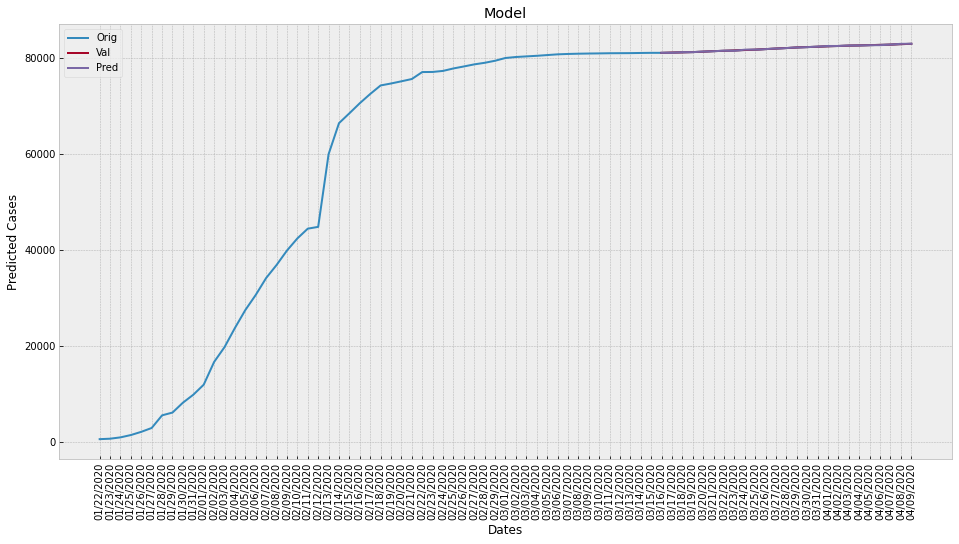

In [62]:
predictions = tree_predictions

valid = df[X.shape[0]:]
valid['Predicted Cases'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Dates')
plt.ylabel('Predicted Cases')
plt.plot(df['China Confirmed Cases'])
plt.plot(valid['China Confirmed Cases'])
plt.plot(valid['Predicted Cases'])
plt.xticks(rotation=90)
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()


In [20]:
valid

,China Confirmed Cases,Predicted Cases
Dates,,
03/16/2020,81003,81003.0
03/17/2020,81058,81003.0
03/18/2020,81102,81156.0
03/19/2020,81156,81156.0
03/20/2020,81250,81250.0
03/21/2020,81350,81350.0
03/22/2020,81435,81435.0
03/23/2020,81498,81435.0
03/24/2020,81591,81661.0


In [21]:
from sklearn.metrics import r2_score
score = r2_score(valid['China Confirmed Cases'], valid['Predicted Cases'])
print(score)

0.9967477378705143


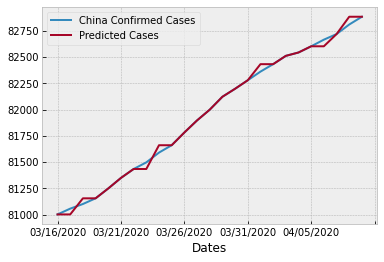

In [22]:
valid.plot()

In [23]:
df2= pd.read_csv('/content/drive/My Drive/Total_cases_China.csv', index_col = 'Dates')
df2.head(10)

,China Confirmed Cases,Confirmed Deaths,Confirmed Recovered
Dates,,,
01/22/2020,548,17,28
01/23/2020,643,18,30
01/24/2020,920,26,36
01/25/2020,1406,42,39
01/26/2020,2075,56,49
01/27/2020,2877,82,58
01/28/2020,5509,131,101
01/29/2020,6087,133,120
01/30/2020,8141,171,135


In [0]:
df2 = df2[['Confirmed Deaths']]

In [25]:
df2.head()

,Confirmed Deaths
Dates,
01/22/2020,17
01/23/2020,18
01/24/2020,26
01/25/2020,42
01/26/2020,56


In [26]:
future_days_deaths = 25
df2['Predicted Deaths'] = df2[['Confirmed Deaths']].shift(-future_days_deaths)
df2.tail(4)

,Confirmed Deaths,Predicted Deaths
Dates,,
04/06/2020,3335,NaN
04/07/2020,3335,NaN
04/08/2020,3337,NaN
04/09/2020,3339,NaN


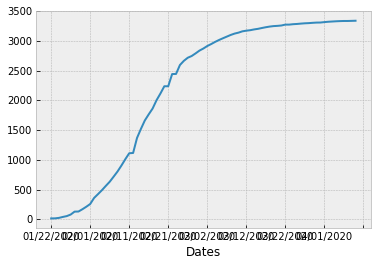

In [27]:
df2['Confirmed Deaths'].plot()

In [28]:
X1 = np.array(df2.drop(['Predicted Deaths'], 1))[:-future_days_deaths]
print(X1)

[[  17]
 [  18]
 [  26]
 [  42]
 [  56]
 [  82]
 [ 131]
 [ 133]
 [ 171]
 [ 213]
 [ 259]
 [ 361]
 [ 425]
 [ 491]
 [ 563]
 [ 633]
 [ 718]
 [ 805]
 [ 905]
 [1012]
 [1112]
 [1117]
 [1369]
 [1521]
 [1663]
 [1766]
 [1864]
 [2003]
 [2116]
 [2238]
 [2238]
 [2443]
 [2445]
 [2595]
 [2665]
 [2717]
 [2746]
 [2790]
 [2837]
 [2872]
 [2914]
 [2947]
 [2983]
 [3015]
 [3044]
 [3072]
 [3100]
 [3123]
 [3139]
 [3161]
 [3172]
 [3180]
 [3193]
 [3203]]


In [29]:
y1 = np.array(df2['Predicted Deaths'])[:-future_days_deaths]
print(y1)

[1766. 1864. 2003. 2116. 2238. 2238. 2443. 2445. 2595. 2665. 2717. 2746.
 2790. 2837. 2872. 2914. 2947. 2983. 3015. 3044. 3072. 3100. 3123. 3139.
 3161. 3172. 3180. 3193. 3203. 3217. 3230. 3241. 3249. 3253. 3259. 3274.
 3274. 3281. 3285. 3291. 3296. 3299. 3304. 3308. 3309. 3316. 3322. 3326.
 3330. 3333. 3335. 3335. 3337. 3339.]


In [0]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X1, y1, test_size = 0.25)


In [0]:
tree2 = DecisionTreeRegressor().fit(x_train2, y_train2)
lr2 = LinearRegression().fit(x_train2, y_train2)

In [32]:
x_future2 = df2.drop(['Predicted Deaths'], 1)[:-future_days_deaths]
x_future2 = x_future2.tail(future_days_deaths)
x_future2 = np.array(x_future2)
x_future2

array([[2238],
       [2238],
       [2443],
       [2445],
       [2595],
       [2665],
       [2717],
       [2746],
       [2790],
       [2837],
       [2872],
       [2914],
       [2947],
       [2983],
       [3015],
       [3044],
       [3072],
       [3100],
       [3123],
       [3139],
       [3161],
       [3172],
       [3180],
       [3193],
       [3203]])

In [33]:
tree_predictions2 = tree2.predict(x_future2)
print(tree_predictions2)
print()
lr_predictions2 = lr2.predict(x_future2)
print(lr_predictions2)

[3223.5 3223.5 3241.  3249.  3253.  3259.  3274.  3274.  3281.  3285.
 3285.  3296.  3296.  3304.  3308.  3309.  3309.  3322.  3326.  3330.
 3333.  3335.  3335.  3337.  3337. ]

[3147.47150579 3147.47150579 3213.10861924 3213.74898133 3261.77613752
 3284.1888104  3300.83822455 3310.12347475 3324.21144056 3339.2599495
 3350.46628594 3363.91388968 3374.47986404 3386.00638152 3396.25217484
 3405.53742504 3414.5024942  3423.46756335 3430.8317273  3435.95462396
 3442.99860687 3446.52059832 3449.08204665 3453.24440019 3456.4462106 ]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


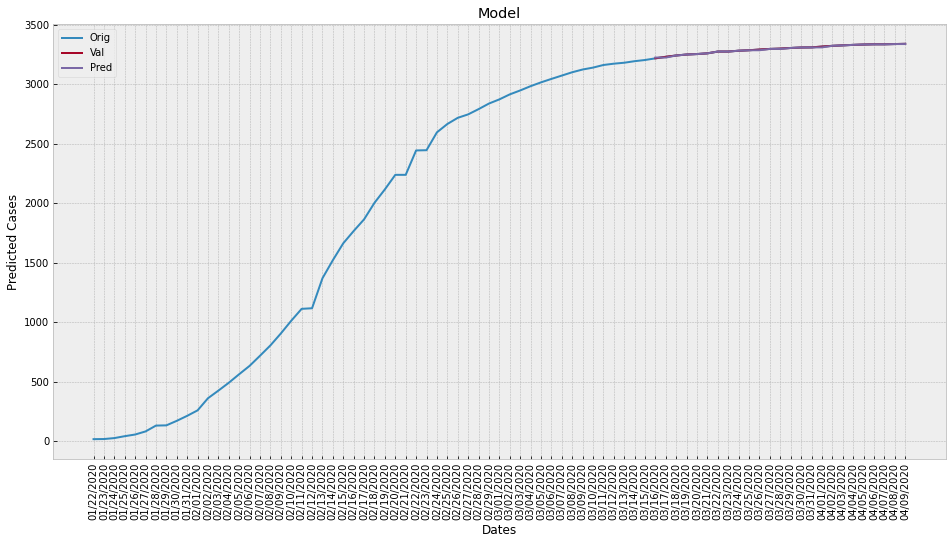

In [63]:
predictions2 = tree_predictions2

valid2 = df2[X1.shape[0]:]
valid2['Predicted Deaths'] = predictions2

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Dates')
plt.ylabel('Predicted Cases')
plt.plot(df2['Confirmed Deaths'])
plt.plot(valid2['Confirmed Deaths'])
plt.plot(valid2['Predicted Deaths'])
plt.xticks(rotation=90)
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()


In [35]:
from sklearn.metrics import r2_score
score2 = r2_score(valid2['Confirmed Deaths'], valid2['Predicted Deaths'])
print(score2)

0.994245995212668


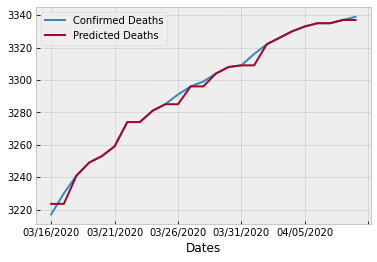

In [36]:
valid2.plot()

In [37]:
df3 = pd.read_csv("/content/drive/My Drive/Total_cases_China.csv", index_col = 'Dates')
df3.head(5)

,China Confirmed Cases,Confirmed Deaths,Confirmed Recovered
Dates,,,
01/22/2020,548,17,28
01/23/2020,643,18,30
01/24/2020,920,26,36
01/25/2020,1406,42,39
01/26/2020,2075,56,49


In [0]:
df3 = df3[['Confirmed Recovered']]

In [39]:
df3.head()

,Confirmed Recovered
Dates,
01/22/2020,28
01/23/2020,30
01/24/2020,36
01/25/2020,39
01/26/2020,49


In [0]:
future_days_recover = 25

In [41]:
df3['Predicted Recovered'] = df3[['Confirmed Recovered']].shift(-future_days_recover)
df3.tail(4)

,Confirmed Recovered,Predicted Recovered
Dates,,
04/06/2020,77310,NaN
04/07/2020,77410,NaN
04/08/2020,77567,NaN
04/09/2020,77679,NaN


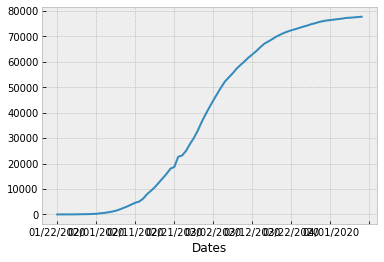

In [42]:
df3['Confirmed Recovered'].plot()

In [43]:
X2 = np.array(df3.drop(['Predicted Recovered'], 1))[:-future_days_recover]
print(X2)

[[   28]
 [   30]
 [   36]
 [   39]
 [   49]
 [   58]
 [  101]
 [  120]
 [  135]
 [  214]
 [  275]
 [  463]
 [  614]
 [  843]
 [ 1115]
 [ 1477]
 [ 1999]
 [ 2596]
 [ 3219]
 [ 3918]
 [ 4636]
 [ 5082]
 [ 6217]
 [ 7977]
 [ 9298]
 [10755]
 [12462]
 [14206]
 [15962]
 [18014]
 [18704]
 [22699]
 [23187]
 [25015]
 [27676]
 [30084]
 [32930]
 [36329]
 [39320]
 [42162]
 [44854]
 [47450]
 [50001]
 [52292]
 [53944]
 [55539]
 [57388]
 [58804]
 [60181]
 [61644]
 [62901]
 [64196]
 [65660]
 [67017]]


In [44]:
y2 = np.array(df3['Predicted Recovered'])[:-future_days_recover]
print(y2)

[10755. 12462. 14206. 15962. 18014. 18704. 22699. 23187. 25015. 27676.
 30084. 32930. 36329. 39320. 42162. 44854. 47450. 50001. 52292. 53944.
 55539. 57388. 58804. 60181. 61644. 62901. 64196. 65660. 67017. 67901.
 68798. 69755. 70535. 71266. 71857. 72362. 72814. 73280. 73773. 74181.
 74720. 75100. 75582. 75923. 76206. 76405. 76565. 76760. 76946. 77207.
 77310. 77410. 77567. 77679.]


In [0]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(X2, y2, test_size = 0.25)


In [0]:
tree3 = DecisionTreeRegressor().fit(x_train3, y_train3)
lr3 = LinearRegression().fit(x_train3, y_train3)

In [47]:
x_future3 = df3.drop(['Predicted Recovered'], 1)[:-future_days_recover]
x_future3 = x_future3.tail(future_days_recover)
x_future3 = np.array(x_future3)
x_future3

array([[18014],
       [18704],
       [22699],
       [23187],
       [25015],
       [27676],
       [30084],
       [32930],
       [36329],
       [39320],
       [42162],
       [44854],
       [47450],
       [50001],
       [52292],
       [53944],
       [55539],
       [57388],
       [58804],
       [60181],
       [61644],
       [62901],
       [64196],
       [65660],
       [67017]])

In [48]:
tree_predictions3 = tree3.predict(x_future3)
print(tree_predictions3)
print()
lr_predictions3 = lr3.predict(x_future3)
print(lr_predictions3)

[67901. 67901. 69755. 70535. 71266. 72362. 72362. 72362. 73280. 73773.
 74181. 74720. 75100. 75582. 75923. 76206. 76405. 76565. 76760. 76946.
 77207. 77310. 77410. 77567. 77679.]

[54357.67152005 54802.02615214 57374.77507269 57689.04327625
 58866.26105516 60579.92435368 62130.65762043 63963.45947973
 66152.38903691 68078.56976816 69908.79565857 71642.42271592
 73314.22652012 74957.05067439 76432.43685135 77496.31199947
 78523.47959103 79714.22120657 80626.11419068 81512.89147819
 82455.05209665 83264.55031771 84098.52024314 85041.32485383
 85915.22229693]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


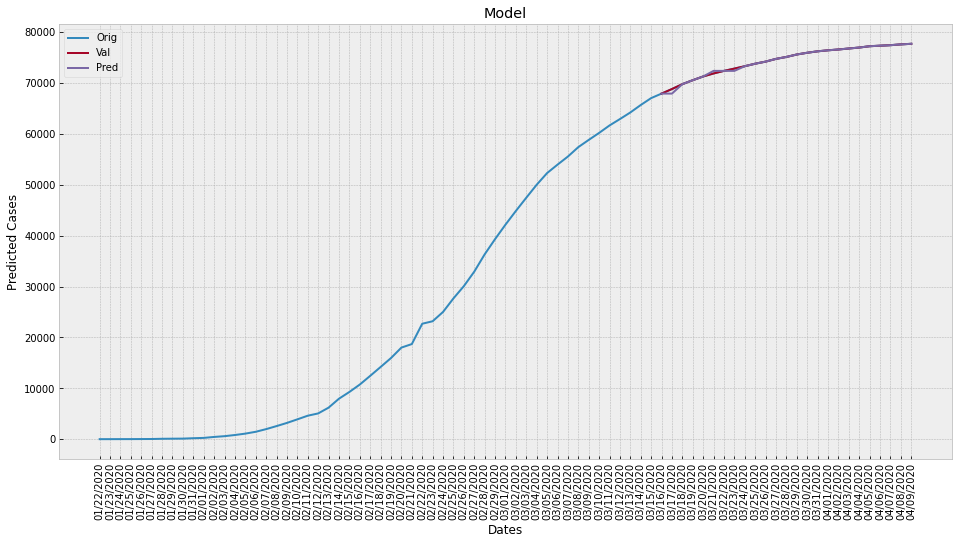

In [64]:
predictions3 = tree_predictions3

valid3 = df3[X2.shape[0]:]
valid3['Predicted Recovered'] = predictions3

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Dates')
plt.ylabel('Predicted Cases')
plt.plot(df3['Confirmed Recovered'])
plt.plot(valid3['Confirmed Recovered'])
plt.plot(valid3['Predicted Recovered'])
plt.xticks(rotation=90)
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()


In [50]:
valid3

,Confirmed Recovered,Predicted Recovered
Dates,,
03/16/2020,67901,67901.0
03/17/2020,68798,67901.0
03/18/2020,69755,69755.0
03/19/2020,70535,70535.0
03/20/2020,71266,71266.0
03/21/2020,71857,72362.0
03/22/2020,72362,72362.0
03/23/2020,72814,72362.0
03/24/2020,73280,73280.0


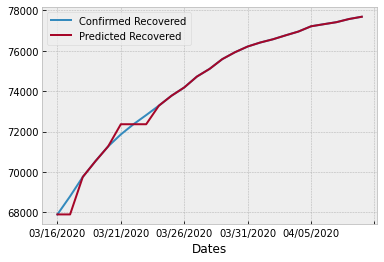

In [51]:
valid3.plot()

In [52]:
valid_final = valid.join(valid2.join(valid3))
valid_final

,China Confirmed Cases,Predicted Cases,Confirmed Deaths,Predicted Deaths,Confirmed Recovered,Predicted Recovered
Dates,,,,,,
03/16/2020,81003,81003.0,3217,3223.5,67901,67901.0
03/17/2020,81058,81003.0,3230,3223.5,68798,67901.0
03/18/2020,81102,81156.0,3241,3241.0,69755,69755.0
03/19/2020,81156,81156.0,3249,3249.0,70535,70535.0
03/20/2020,81250,81250.0,3253,3253.0,71266,71266.0
03/21/2020,81350,81350.0,3259,3259.0,71857,72362.0
03/22/2020,81435,81435.0,3274,3274.0,72362,72362.0
03/23/2020,81498,81435.0,3274,3274.0,72814,72362.0
03/24/2020,81591,81661.0,3281,3281.0,73280,73280.0


In [53]:
from sklearn.metrics import r2_score
score3 = r2_score(valid3['Confirmed Recovered'], valid3['Predicted Recovered'])
print(score3)

0.9939561963360559


In [54]:
average = (score + score2 + score3) / 3
average

0.9949833098064126

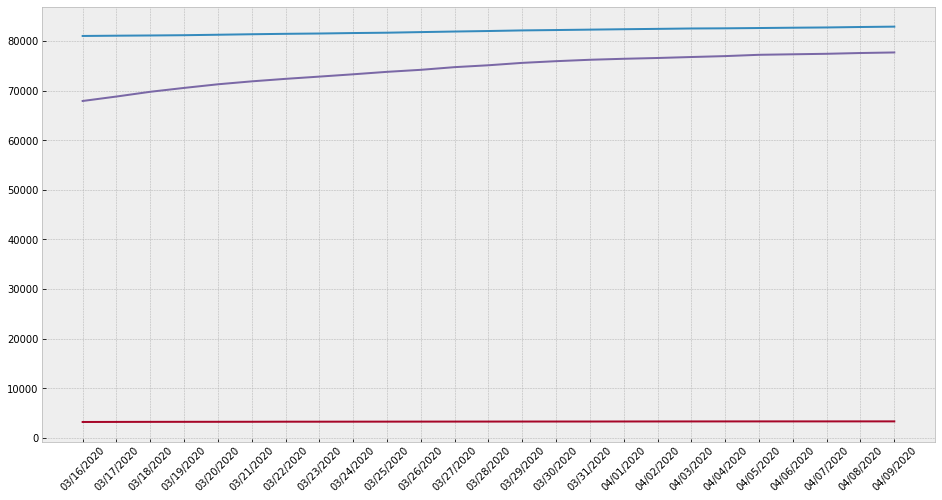

In [70]:
plt.figure(figsize=(16,8))
plt.plot(valid_final['China Confirmed Cases'])
plt.plot(valid_final['Confirmed Deaths'])
plt.plot(valid_final['Confirmed Recovered'])
plt.xticks(rotation=45)
#plt.legend('Cases', 'Deaths', 'Recovered')
plt.show()

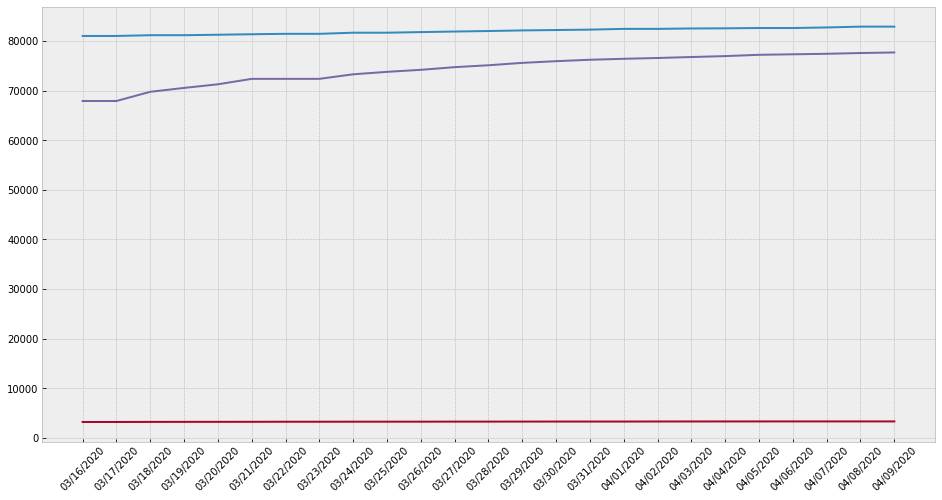

In [65]:
plt.figure(figsize=(16,8))
plt.plot(valid_final['Predicted Cases'])
plt.plot(valid_final['Predicted Deaths'])
plt.plot(valid_final['Predicted Recovered'])
plt.xticks(rotation=45)
plt.show()